<a href="https://colab.research.google.com/github/sai-krishna-dalai-333/AI-ML/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classifiction

In [ ]:
#import all libraries
import tensorflow as tf  
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
 #load_data() function is to load the data and distribute data to train and  to test
 #cifar10 is the name of the dataset which consists of 10 type of images

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
X_test.shape  #check how much data is alloated for testing

(10000, 32, 32, 3)

In [ ]:
y_train.shape #find the all possible dimensions for trin and test  


(50000, 1)

there are 50000 points with output one unit

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

it is a 2-D array , mke it as a single dimensional array

In [ ]:
y_train = y_train.reshape(-1,) #reshape() method to change the dimension
y_train[:5] #check fr frst 5 points

array([6, 9, 9, 4, 1], dtype=uint8)

resphpe the test of output also

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# make a list of classes which holds the string value of labels 

In [ ]:
#plot some images to identify wht type of images
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index]) #imshow is to visualize the image
    plt.xlabel(classes[y[index]])  # label the x-axis with label generted with output(y)

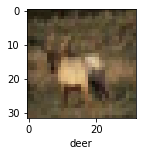

In [ ]:
plot_sample(X_train, y_train, 3)

We are here showing the pixel value of each image by using imshow method.
Each pixel have the value between 0 and 255.
Now our is to noramalize the each pixel to get value between 0 and 1

In [ ]:
#since the input is pixel normlize the pixel values by dividing it with 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Built an ANN
ann = models.Sequential([                            #here sequential is the type of model,it is the easiest model
        layers.Flatten(input_shape=(32,32,3)),       #Flatten,dense are the type of layers, here it is the ANN with 1 i/p layer (flatten),
                                                     #2 hidden layers (dense) and one output layer (dense) which need to classify among 10 types
        layers.Dense(3000, activation='relu'),        #3000 is the number of nodes in one perceptron, and activation function 'relu' 
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 144s 91ms/step - loss: 1.8136 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6226 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.5422 - accuracy: 0.4576
Epoch 4/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4815 - accuracy: 0.4796
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4325 - accuracy: 0.4953


You can see that at the end of 5 epochs, accuracy is at around 49%

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.43      0.50      1000
           1       0.69      0.51      0.59      1000
           2       0.38      0.41      0.39      1000
           3       0.33      0.38      0.35      1000
           4       0.51      0.26      0.35      1000
           5       0.37      0.45      0.40      1000
           6       0.47      0.67      0.55      1000
           7       0.71      0.39      0.50      1000
           8       0.45      0.80      0.58      1000
           9       0.59      0.51      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



Built an CNN

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4942 - accuracy: 0.4610
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1341 - accuracy: 0.6004
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0008 - accuracy: 0.6519
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9241 - accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8605 - accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8139 - accuracy: 0.7159
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7701 - accuracy: 0.7328
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7384 - accuracy: 0.7420
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7002 - accuracy: 0.7563
Epoch 10/10
1563/1563 [==============================] - 61s 39m

Gives the accuracy of 70% by CNN.

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8847 - accuracy: 0.7072


[0.8846508860588074, 0.7071999907493591]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:10]

array([[5.69388852e-04, 2.12477124e-03, 7.78441178e-03, 3.80603462e-01,
        3.56835750e-04, 7.86517933e-03, 9.73998941e-03, 2.47355056e-05,
        5.88905096e-01, 2.02614395e-03],
       [1.25807058e-03, 2.14303806e-02, 2.87456572e-07, 1.47241286e-08,
        3.36862556e-08, 6.35082786e-09, 1.09374518e-08, 3.02250758e-09,
        9.77208495e-01, 1.02644837e-04],
       [5.52866049e-02, 9.30413902e-02, 5.54128783e-04, 3.44013888e-03,
        2.56170111e-04, 1.40539763e-04, 6.89985289e-04, 3.99905839e-04,
        8.05491090e-01, 4.07000482e-02],
       [9.33756530e-01, 9.07234009e-03, 2.95526031e-02, 5.31990954e-04,
        5.15252445e-03, 3.51097624e-05, 9.28129943e-04, 3.99520970e-04,
        1.97943095e-02, 7.77058129e-04],
       [1.80017241e-06, 6.80669746e-06, 7.93017261e-03, 1.42864054e-02,
        7.82809481e-02, 2.46135372e-04, 8.99125874e-01, 9.65032814e-06,
        1.08662229e-04, 3.60004765e-06],
       [3.56797573e-05, 1.05631325e-05, 1.30059919e-03, 7.29977200e-03,
   

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[8, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)